## Zadanie domowe: morfologiczna gra w życie – John Conway

### Wykorzystanie operacji LUT w przekształceniu trafi, nie trafi
  - Szybszą metodą wykonania transformacji trafi, nie trafi może być operacja LUT.
  - Technika polega na zakodowaniu wyników wszystkich interesujących  konfiguracji, a następnie podczas przetwarzania wykorzystania operacji LUT.
  - Dla otoczenia 3x3 możliwe jest 512 różnych konfiguracji.
  - Aby praktycznie zrealizować operacje, każdej konfiguracji należy nadać unikalny indeks. Jedną z możliwości jest pomnożenie elementu strukturalnego przez macierz (mnożenie odpowiednich elementów):
  ```
  [[1, 8,  64],
   [ 2, 16, 128],
   [ 4, 32, 256]]
  ```
  Przykładowo elementowi:
  ```
  [[1, 1, 0],
   [ 1, 0, 1],
   [ 1, 0, 1]]
  ```
  odpowiada liczba: 1(1) + 2(1) + 4(1) + 8(1) + 128(1) + 256(1) = 399.
  
### Przykład działania metody – detekcja punktów końcowych na obrazie.
  - założenie: punkt końcowy to punkt, który ma dokładnie jednego sąsiada,
  - zdefiniuj funkcję, która jako argument pobiera otoczenie, a zwraca 0 lub 1 w zależności od tego, czy rozpatrywany punkt jest końcowy np. dla sąsiedztwa 3×3 punkt będzie końcowy, jeżeli jest zapalony i ma tylko jednego sąsiada (czyli suma pikseli jest równa 2).
  - wygeneruj przekodowanie LUT.
  - wczytaj obraz szkielet.bmp (należy go przekształcić, aby uzyskać dwuwymiarową tablicę o wartościach 0-1). Wykorzystując wygenerowane przekodowanie LUT wykonaj detekcję zakończeń. Wyświetl obraz oryginalny i po przekodowaniu LUT.

### Gra w życie

Reguły gry w życie:
  - każdy piksel biały, który ma dwóch lub trzech sąsiadów (białych) przeżywa,
  - każdy piksel biały, który ma 0,1 lub więcej niż trzech sąsiadów (białych) nie przeżywa (głód lub przeludnienie),
  - jeżeli jakieś pole (czarne) sąsiaduje dokładnie z trzema pikselami białymi, to na tym polu ,,rodzi'' się nowy piksel biały.

Zadanie:
  - za pomocą mechanizmu LUT (opisanego wcześniej) należy zaimplementować morfologiczną gre w życie,
  - najważniejszym elementem jest funkcja opisująca reguły gry,
  - symulacje należny przeprowadzić dla plansz dostarczonych w pliku gra.py,
  - dobrze jest wykonać kilka iteracji – zobaczyć jak zmienia się kształt,
  - inne ciekawe kształty do znalezienia w internecie.


[[ 17  24  80]
 [ 18  32 144]
 [ 20  48 272]]


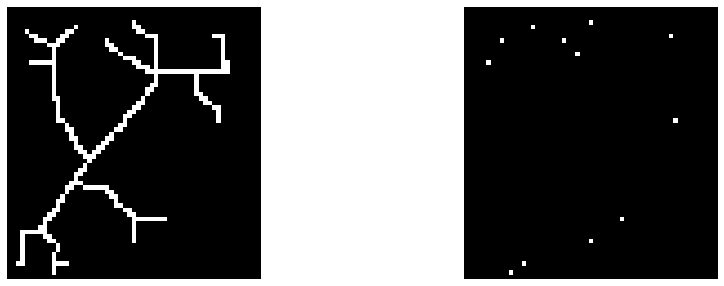

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import gra

if not os.path.exists("gra.py") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/10_Morfologia/gra.py --no-check-certificate

struct = np.array([[1,8,64],[2,16,128],[4,32,256]]).astype("uint8")
lut = np.zeros((512,), dtype=int)
tab = [17,24,80,18,144,20,48,272]
for x in tab:
    lut[x] = 1

def end(S):
    v = 0
    for i in range(S.shape[0]):
        for j in range(S.shape[1]):
            v += S[i,j]*struct[i,j]
    return lut[int(v)]

I = cv2.imread("szkielet.bmp", cv2.IMREAD_GRAYSCALE)
I = I/255
        

        
II = I.copy()
X,Y = I.shape
for i in range (1, X-1):
    for j in range (1, Y-1):
        row_up = i - 1
        row_down = i + 2

        col_left = j - 1
        col_right = j + 2

        S = np.array(I[row_up : row_down, col_left : col_right])     
        II[i,j] = end(S)    
fig, axs = plt.subplots(1,2)
fig.set_size_inches(15,5)

axs[0].imshow(I, 'gray')
axs[0].axis('off')
axs[1].imshow(II, 'gray')
axs[1].axis('off')

s = np.array([[1, 8,  64],
[ 2, 16, 128],
[ 4, 32, 256]])
print(s+16)

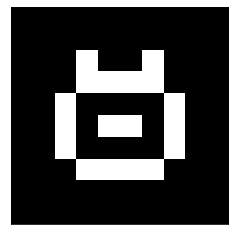

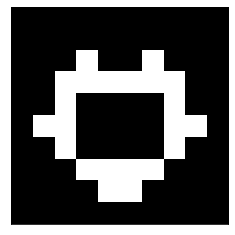

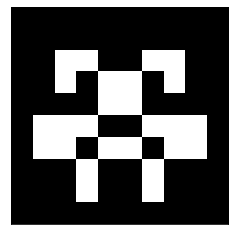

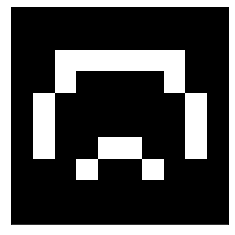

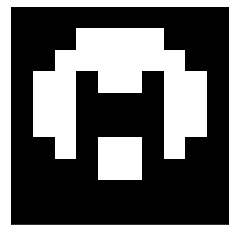

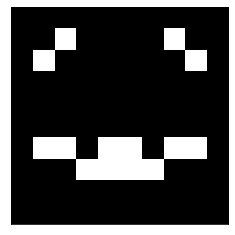

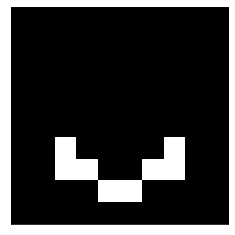

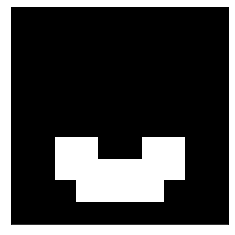

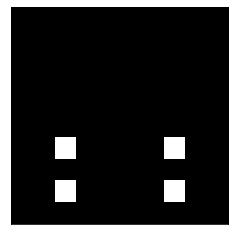

In [2]:
import gra

struct = np.array([[1,8,64],[2,16,128],[4,32,256]]).astype("int64")
lut = np.zeros((512,)).astype("int64")
tab = []

for i in range(struct.shape[0]):
    for j in range(struct.shape[1]):
        if not i == j == 1:
            elem = struct[i, j] + struct[1, 1]
            for k in range(struct.shape[0]):
                for l in range(struct.shape[1]):
                    if not k == l == 1 and not (k == i and l == j):
                        elem2 = elem + struct[k, l]
                        tab.append(elem2)
                        for m in range(struct.shape[0]):
                            for n in range(struct.shape[1]):
                                if not m == n == 1 and not (m == k and n == l) and not (m == i and n == j):
                                    elem3 = elem2 + struct[m, n]
                                    tab.append(elem3)
                                    tab.append(elem3-16)
            
for x in tab:
    lut[x] = 1
    

def gol(S):
    v = 0
    for i in range(S.shape[0]):
        for j in range(S.shape[1]):
            v += S[i,j]*struct[i,j]
    return lut[int(v)]

def game(I):
    IP = I.copy()
    X,Y = I.shape
    for i in range (1, X-1):
        for j in range (1, Y-1):
            row_up = i - 1
            row_down = i + 2

            col_left = j - 1
            col_right = j + 2

            S = np.array(I[row_up : row_down, col_left : col_right])     
            IP[i,j] = gol(S)
    return IP
        
def plot(I):
    plt.imshow(I,'gray')
    plt.xticks([]), plt.yticks([])
    plt.show()

I = gra.plansza1
plot(I)
for i in range(8):
    I = game(I)
    plot(I)